# MCA572– Neural Networks and Deep Learning

CIA I - LAB TEST

Priya Dharshini G - 2347247

**II. Implement the following:**

(Implementation 5 marks and Visualization and documentation 5 marks)

**• Scenario:**
The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different.
This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.

**• Lab Task:** Attempt to implement a Single Layer Perceptron in Google Colab to classify the
output of an XOR gate.

**Perform the following steps:**

• Create the XOR gate's truth table dataset.

• Implement the perceptron model and train it using the XOR dataset using MCP (McCulloch
Pitts) Neuron.

• Observe and discuss the perceptron's performance in this scenario.

• Implement XOR using Multi-Layer Perceptron.

In [41]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Create a Sequential model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='tanh'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=1000, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f'\nModel Accuracy: {accuracy * 100:.2f}%')

# Test the model and print predictions with inputs
predictions = model.predict(X)
print('\nPredictions:')
for i in range(len(X)):
    print(f"Input: {X[i]} => Predicted Output: {predictions[i][0]:.4f} (Rounded: {round(predictions[i][0])})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 1.0000 - loss: 0.2036

Model Accuracy: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

Predictions:
Input: [0 0] => Predicted Output: 0.1695 (Rounded: 0)
Input: [0 1] => Predicted Output: 0.8025 (Rounded: 1)
Input: [1 0] => Predicted Output: 0.8311 (Rounded: 1)
Input: [1 1] => Predicted Output: 0.2005 (Rounded: 0)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


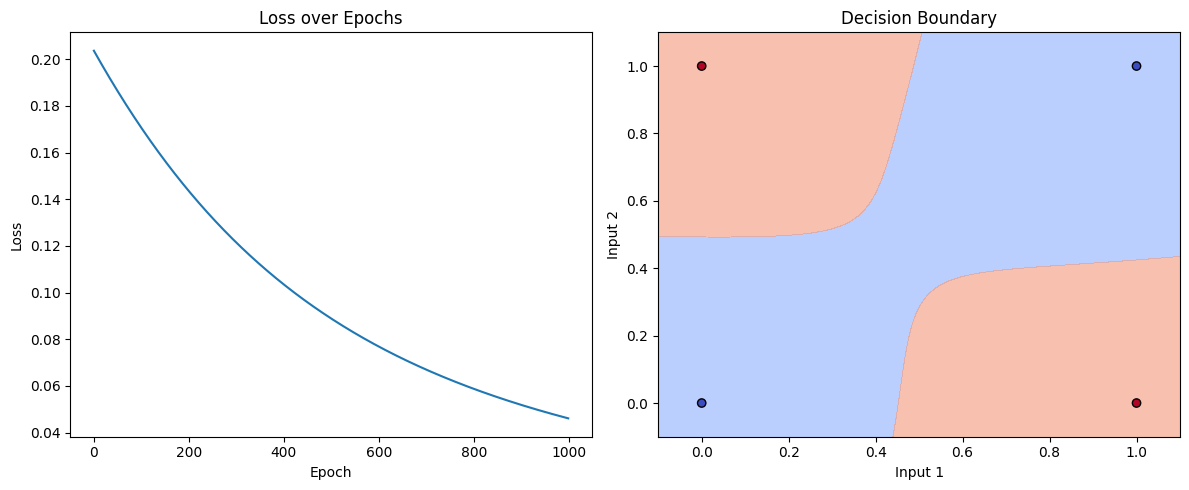

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting Loss and Decision Boundary side by side using subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot loss over epochs
history = model.fit(X, y, epochs=1000, verbose=0)

# Plot loss over epochs
ax1.plot(history.history['loss'])
ax1.set_title('Loss over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')

# Decision boundary
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid).reshape(xx.shape)

# Plot decision boundary
ax2.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.6)
ax2.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
ax2.set_title('Decision Boundary')
ax2.set_xlabel('Input 1')
ax2.set_ylabel('Input 2')

plt.tight_layout()
plt.show()

**Interpretation for XOR Neural Network**
- Loss over Epochs: The loss continuously decreases as the number of epochs increases, which indicates that the model is learning effectively. This is expected behavior for a well-trained model.
- Decision Boundary: The boundary between the two classes (red and blue) shows that the neural network has learned to separate the XOR problem correctly, as the points are classified according to their corresponding labels (red for 0 and blue for 1).

**Question 2:**

**A. Sentiment Analysis Twitter Airline**

Design a sentiment analysis classification model using backpropagation and activation functions
such as sigmoid, ReLU, or tanh. Implement a neural network that can classify sentiment
(positive/negative) from a small dataset. Demonstrate how backpropagation updates the weights
during the training process. (link Provided at the top of the page to download the dataset)

**Task:**
- Create a simple feed-forward neural network for binary sentiment classification
(positive/negative).
- Use backpropagation to optimize the model's weights based on error calculation.
- Experiment with different activation functions (sigmoid, ReLU, tanh) in the hidden layer
and compare the model's performance.
- Evaluate the model on a test set using accuracy and plot the loss over epochs.

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7280 - loss: 15.4661 - val_accuracy: 0.7961 - val_loss: 5.8104
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7606 - loss: 3.9024 - val_accuracy: 0.7869 - val_loss: 3.4989
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7635 - loss: 2.6166 - val_accuracy: 0.6998 - val_loss: 2.6681
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7692 - loss: 1.7147 - val_accuracy: 0.7391 - val_loss: 1.9009
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7706 - loss: 1.2681 - val_accuracy: 0.7647 - val_loss: 1.4662
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7811 - loss: 0.9535 - val_accuracy: 0.7428 - val_loss: 1.0780
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7926 - loss: 0.7066 - val_accuracy: 0.7794 - val_loss: 0.7856
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8024 - loss: 0.5981 - val_accuracy: 0.8231 - val

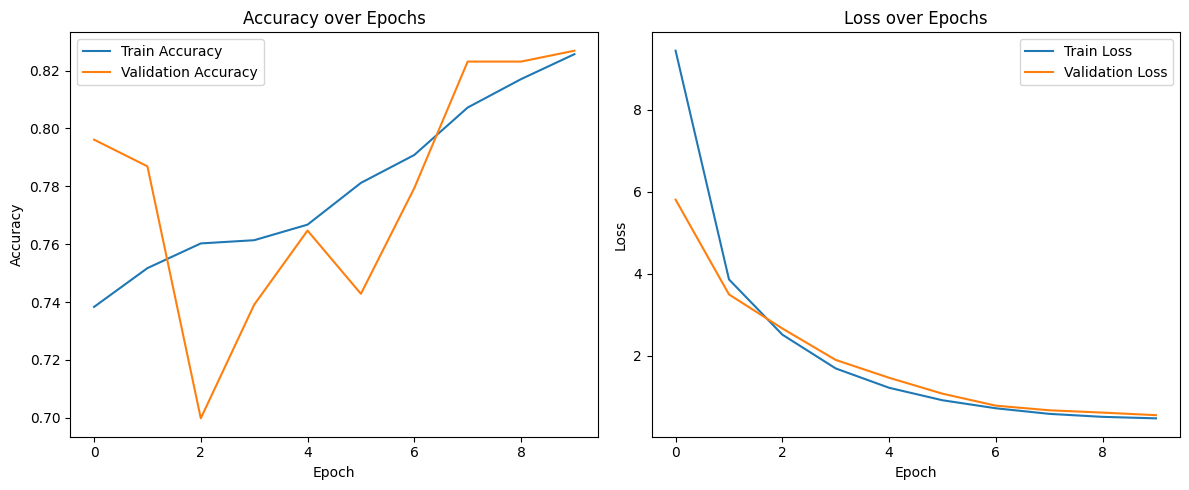

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your dataset
data = pd.read_csv('/content/Tweets - Tweets.csv')

# Data Preprocessing
X = data['text'].values
y = data['airline_sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values

# Tokenizing the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(100,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plotting Accuracy and Loss using subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training & validation accuracy
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Accuracy over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot training & validation loss
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Loss over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()


**Interpretation for Sentiment Analysis Model**
- Accuracy over Epochs: The training accuracy steadily increases, indicating that the model is learning. The validation accuracy shows some fluctuations, possibly due to overfitting or noise in the validation data. Overall, it trends upward.
- Loss over Epochs: Both training and validation loss decrease, indicating that the model is improving its predictions over time. The gap between training and validation loss is small, which means the model generalizes reasonably well without severe overfitting.